In [9]:
import torch
import torchvision
from torchvision import transforms, datasets

train = datasets.MNIST('', train=True, download=True,transform=transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST('', train=False, download=True,transform=transforms.Compose([transforms.ToTensor()]))

In [10]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=False)

In [11]:
import torch.nn as nn
import torch.nn.functional as F 

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [12]:
import torch.optim as optim

loss_function = nn.CrossEntropyLoss()

optimizer = optim.Adam(net.parameters(), lr=0.001)

EPOCHS = 3

for epoch in range(EPOCHS):
    for data in trainset:
        X, y = data
        net.zero_grad()
        output = net(X.view(-1,28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)


tensor(0.1313, grad_fn=<NllLossBackward>)
tensor(0.0013, grad_fn=<NllLossBackward>)
tensor(0.0226, grad_fn=<NllLossBackward>)


In [13]:
for epoch in range(EPOCHS):
    for data in testset:
        X, y = data
        net.zero_grad()
        output = net(X.view(-1,28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)

tensor(0.1734, grad_fn=<NllLossBackward>)
tensor(0.0003, grad_fn=<NllLossBackward>)
tensor(0.0027, grad_fn=<NllLossBackward>)


In [14]:
correct = 0
total = 0

with torch.no_grad():
    for data in testset:
        X, y = data
        output = net(X.view(-1, 28*28))
        correct += output.argmax(dim=1).eq(y).sum().item()
        total += len(y)

print("Accucracy: ", round(correct/total, 3))

Accucracy:  0.981


In [15]:
correct = 0
total = 0

with torch.no_grad():
    for data in trainset:
        X, y = data
        output = net(X.view(-1, 28*28))
        correct += output.argmax(dim=1).eq(y).sum().item()
        total += len(y)

print("Accucracy: ", round(correct/total, 3))

Accucracy:  0.963


In [64]:
import cv2

img = cv2.imread('3test.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28,28))
testimg = torch.Tensor(img).view(-1,28,28)
testimg = testimg/255.0

with torch.no_grad():
    output = net(testimg.view(-1, 28*28))
print(output.argmax(dim=1))




tensor([[ -0.1759, -17.7677,  -2.5644, -10.1962, -31.9183, -10.5136,  -2.4735,
         -15.2191, -20.6678, -23.3695]])


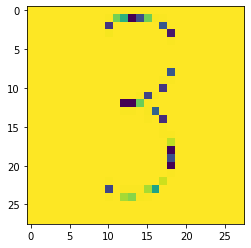

In [58]:
import matplotlib.pyplot as plt

plt.imshow(testimg.view(28,28))
plt.show()
